### Import libraries

In [1]:
!pip install sastrawi

     |████████████████████████████████| 209 kB 15.1 MB/s 


In [2]:
import re   
# import sys 
import requests 
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import operator

### Stemming and STOPWORDS

In [3]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [4]:
def load_stopWords():
    url = "https://raw.githubusercontent.com/Wayan123/Sentiment-Analysis/main/stopwordlist.txt"
    ina_stopword = requests.get(url).content
    return ina_stopword.split()

stopwords = load_stopWords()

In [5]:
stopwords

[b'zahwa',
 b'laweyan',
 b'sriwedari',
 b'sang',
 b'aantasyaf',
 b'menurutku',
 b'chi',
 b'partecipa',
 b'al',
 b'tuo',
 b'piacere',
 b'ma',
 b'non',
 b'al',
 b'la',
 b'doloreperde',
 b'chiave',
 b'una',
 b'delle',
 b'sette',
 b'portedel',
 b'paradisopuoi',
 b'dimenticare',
 b'persona',
 b'con',
 b'cui',
 b'hai',
 b'piantokhalil',
 b'gibranangelo',
 b'tristesecoloartista',
 b'sconosciuto',
 b'a',
 b'ada',
 b'aja',
 b'adalah',
 b'adakah',
 b'adanya',
 b'adapun',
 b'agak',
 b'agaknya',
 b'agar',
 b'akan',
 b'akankah',
 b'akhir',
 b'akhiri',
 b'akhirilah',
 b'akhirnya',
 b'aku',
 b'akulah',
 b'akupun',
 b'amat',
 b'amati',
 b'amatilah',
 b'amatlah',
 b'anda',
 b'andalah',
 b'antar',
 b'antara',
 b'antaranya',
 b'apa',
 b'apaan',
 b'apabila',
 b'apakah',
 b'apalagi',
 b'apalah',
 b'apatah',
 b'arti',
 b'artinya',
 b'asal',
 b'asalkan',
 b'asalnya',
 b'atas',
 b'atasi',
 b'atasnya',
 b'atau',
 b'ataukah',
 b'ataupun',
 b'awal',
 b'awalnya',
 b'bagai',
 b'bagaikan',
 b'bagaimana',
 b'bagaima

### Stemming Function

In [7]:
def cleanData(sentence):
	#sentence = re.sub('[^A-Za-z0-9 ]+', '', sentence)
	#sentence filter(None, re.split("[.!?", setence))
	ret = []
	sentence = stemmer.stem(sentence)	
	for word in sentence.split():
		if not word in stopwords:
			ret.append(word)
	return " ".join(ret)

### Vectorization Function

In [8]:
def getVectorSpace(cleanSet):
	vocab = {}
	for data in cleanSet:
		for word in data.split():
			vocab[data] = 0
	return vocab.keys()

### Cosine Similarity Function

In [9]:
def calculateSimilarity(sentence, doc):
	if doc == []:
		return 0
	vocab = {}
	for word in sentence:
		vocab[word] = 0
	
	docInOneSentence = '';
	for t in doc:
		docInOneSentence += (t + ' ')
		for word in t.split():
			vocab[word]=0	
	
	cv = CountVectorizer(vocabulary=vocab.keys())

	docVector = cv.fit_transform([docInOneSentence])
	sentenceVector = cv.fit_transform([sentence])
	return cosine_similarity(docVector, sentenceVector)[0][0]

### Load Raw Data from GitHub

In [10]:
r = requests.get('https://raw.githubusercontent.com/fajri91/Text-Summarization-MMR/master/news_data4.txt')
r.encoding = r.apparent_encoding
texts = r.text.split('\n')

In [11]:
texts

['Pemerintah memutuskan pembayaran Tunjangan Hari Raya (THR) atau gaji ke-14 dan gaji ke-13 tidak sekaligus. Gaji ke-14 rencananya akan dibayarkan terlebih dahulu, yaitu bulan Juni ini, sementara gaji ke-13 baru akan dibayarkan pada Juli mendatang.',
 '',
 'Deputi SDM Aparatur Kementerian Pendayagunaan Aparatur Negara dan Reformasi Birokrasi (PANRB) Setiawan Wangsaatmadja membenarkan hal itu. Ia menjelaskan, pembayaran gaji ke-14 dan gaji ke-13 tidak bisa dibayarkan sekaligus dikarenakan kondisi keuangan negara.',
 '',
 '“Saat rapat terakhir, Kementerian Keuangan menyatakan bahwa cashflow tidak mendukung untuk melaksanakan pembayaran gaji ke-13 danTHR sekaligus,” kata Setiawan, seperti dikutip dalam lamanSetkab.go.id, Kamis (2/6/2016).',
 '',
 'Menurut Setiawan, ketentuan mengena gaji ke-13 dan THR tersebut dituangkan dalam dua Peraturan Pemerintah (PP). “Saat ini RPP-nya sudah selesai diharmonisasi dan sudah diserahkan ke Kementerian Sekretariat Negara untuk selanjutnya ditandatangani

In [12]:
%time

sentences = []
clean = []
originalSentenceOf = {}

# Data cleansing
for line in texts:
	parts = line.split('.')
	for part in parts:
		cl = cleanData(part)
		# print cl
		sentences.append(part)
		clean.append(cl)
		originalSentenceOf[cl] = part		
setClean = set(clean)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs


### Count the Cosine Similarity Scores

In [13]:
scores = {}
for data in clean:
	temp_doc = setClean - set([data])
	score = calculateSimilarity(data, list(temp_doc))
	scores[data] = score
	print(scores)

{'perintah putus bayar tunjang hari raya thr atau gaji ke-14 dan gaji ke-13 tidak sekaligus': 0.709073702318972}
{'perintah putus bayar tunjang hari raya thr atau gaji ke-14 dan gaji ke-13 tidak sekaligus': 0.709073702318972, 'gaji ke-14 rencana akan bayar lebih dahulu yaitu bulan juni ini sementara gaji ke-13 baru akan bayar pada juli datang': 0.5017560502523286}
{'perintah putus bayar tunjang hari raya thr atau gaji ke-14 dan gaji ke-13 tidak sekaligus': 0.709073702318972, 'gaji ke-14 rencana akan bayar lebih dahulu yaitu bulan juni ini sementara gaji ke-13 baru akan bayar pada juli datang': 0.5017560502523286, '': 0.0}
{'perintah putus bayar tunjang hari raya thr atau gaji ke-14 dan gaji ke-13 tidak sekaligus': 0.709073702318972, 'gaji ke-14 rencana akan bayar lebih dahulu yaitu bulan juni ini sementara gaji ke-13 baru akan bayar pada juli datang': 0.5017560502523286, '': 0.0}
{'perintah putus bayar tunjang hari raya thr atau gaji ke-14 dan gaji ke-13 tidak sekaligus': 0.70907370231

### Using Maximum Marginal Relevance (MMR) Algorithm

In [14]:
n = 20 * len(sentences) / 100
alpha = 0.5
summarySet = []
while n > 0:
	mmr = {}

	for sentence in scores.keys():
		if not sentence in summarySet:
			mmr[sentence] = alpha * scores[sentence] - (1-alpha) * calculateSimilarity(sentence, summarySet)	
	selected = max(mmr.items(), key=operator.itemgetter(1))[0]	
	summarySet.append(selected)
	n -= 1

### Display the summary result

In [16]:
print ('\nThe Summarization Result\n')
for sentence in summarySet:
	print (originalSentenceOf [sentence].lstrip(' '))


The Summarization Result

Pemerintah memutuskan pembayaran Tunjangan Hari Raya (THR) atau gaji ke-14 dan gaji ke-13 tidak sekaligus
“Saat ini RPP-nya sudah selesai diharmonisasi dan sudah diserahkan ke Kementerian Sekretariat Negara untuk selanjutnya ditandatangani Presiden,” terang Setiawan
Untuk Pegawai Negeri Sipil (PNS), anggota TNI/POLRI, gaji ke-13 itu meliputi gaji pokok, tunjangan keluarga, tunjangan jabatan atau tunjangan umum dan tunjangan kinerja
Ia menjelaskan, pembayaran gaji ke-14 dan gaji ke-13 tidak bisa dibayarkan sekaligus dikarenakan kondisi keuangan negara
Untuk THR, akan diberikan sebesar gaji pokok
id, Kamis (2/6/2016)


### Comparing the Summary Text with the Original Text

In [17]:
print ('\nOriginal Text\n')
from termcolor import colored 

for sentence in clean:
	if sentence in summarySet:
		print (colored(originalSentenceOf[sentence].lstrip(' '),'red'))
	else:
		print (originalSentenceOf[sentence].lstrip(' '))


Original Text

Pemerintah memutuskan pembayaran Tunjangan Hari Raya (THR) atau gaji ke-14 dan gaji ke-13 tidak sekaligus
Gaji ke-14 rencananya akan dibayarkan terlebih dahulu, yaitu bulan Juni ini, sementara gaji ke-13 baru akan dibayarkan pada Juli mendatang


Deputi SDM Aparatur Kementerian Pendayagunaan Aparatur Negara dan Reformasi Birokrasi (PANRB) Setiawan Wangsaatmadja membenarkan hal itu
Ia menjelaskan, pembayaran gaji ke-14 dan gaji ke-13 tidak bisa dibayarkan sekaligus dikarenakan kondisi keuangan negara


“Saat rapat terakhir, Kementerian Keuangan menyatakan bahwa cashflow tidak mendukung untuk melaksanakan pembayaran gaji ke-13 danTHR sekaligus,” kata Setiawan, seperti dikutip dalam lamanSetkab
go
id, Kamis (2/6/2016)


Menurut Setiawan, ketentuan mengena gaji ke-13 dan THR tersebut dituangkan dalam dua Peraturan Pemerintah (PP)
“Saat ini RPP-nya sudah selesai diharmonisasi dan sudah diserahkan ke Kementerian Sekretariat Negara untuk selanjutnya ditandatangani Presiden,” t

### Visualization with WordCloud

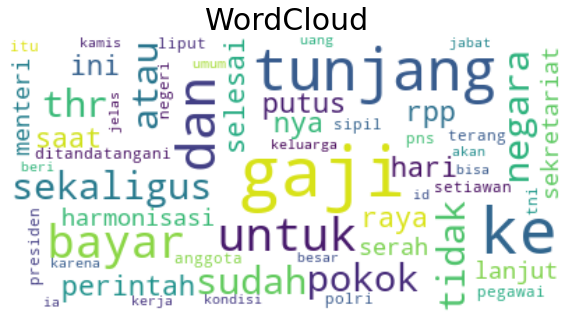

In [18]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

text = str(summarySet).replace("'","")

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white",
                      prefer_horizontal=0.80).generate(text)
plt.figure(figsize=(10,50))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("WordCloud", fontsize=30)
plt.axis("off")
plt.show()